In [ ]:
import kagglehub

path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
# Importing the required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Input

In [ ]:
# Loading the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [ ]:
# Dataset Classes
classes = os.listdir(train_dir)
num_classes = len(classes)

print("Number of classes:", num_classes)
print(classes)

Number of classes: 2
['nofire', 'fire']


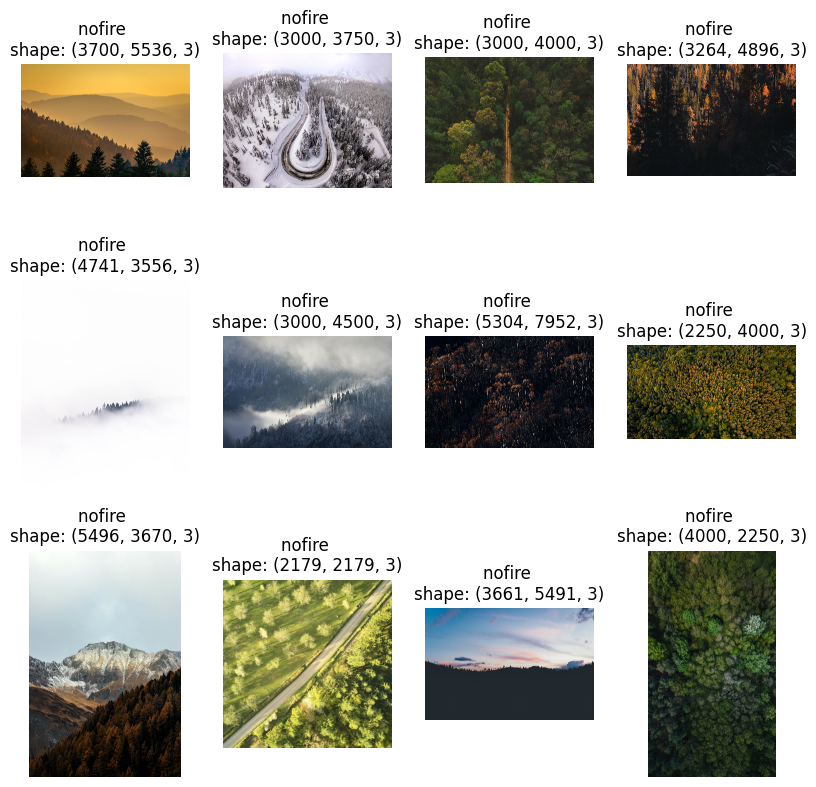

In [ ]:
# No-fire images in the dataset
plt.figure(figsize=(10, 10))
for i in range(12):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(3, 4, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \nshape: {img.shape}')
  plt.axis('off')
plt.show()

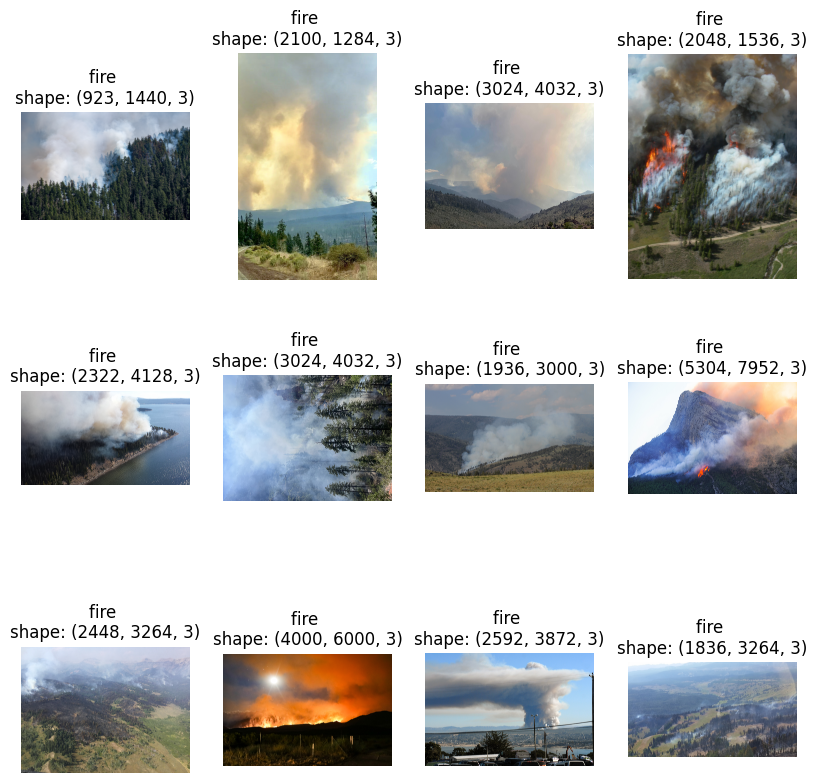

In [ ]:
# Fire images in the dataset
plt.figure(figsize=(10, 10))
for i in range(12):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(3, 4, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \nshape: {img.shape}')
  plt.axis('off')
plt.show()

In [ ]:
#Preprocessing
img_width, img_height = 150,150
batch_size = 32

#Data Generators
train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = 'True'
)

val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = 'True'
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = 'True'
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
#Index mapping
class_mapping = train_generator.class_indices

#Extract class names
class_names = list(class_mapping.keys())
print(f"Class Names : {class_names}")

Class Names : ['fire', 'nofire']


In [ ]:
#Convolution Neural Network(CNN) Model
model = Sequential(
    [
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),     # 32 filters are applied
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),     # 64 filters are applied
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),    # 128 filters are applied
    MaxPooling2D((2, 2)),

    Flatten(),                                 # Converts the data into single vector
    Dense(512, activation='relu'),
    Dropout(0.5),                              # To avoid overfitting
    Dense(1, activation='sigmoid')             # sigmoid function gives the result for classification
    ]
)